[[1.]
 [3.]
 [2.]]
[[2.428301 3.157924]
 [5.813503 2.633656]
 [7.119387 3.616684]]


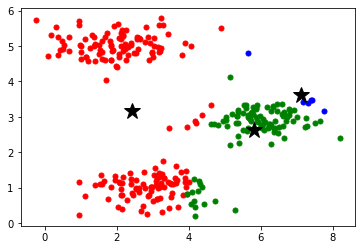

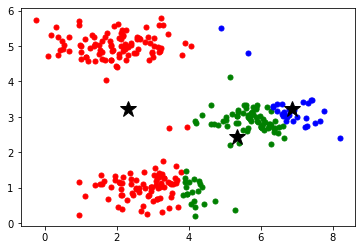

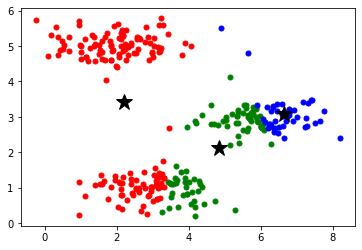

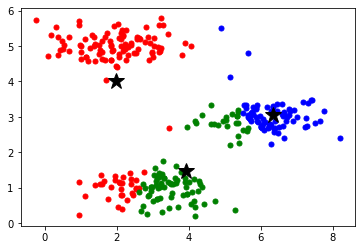

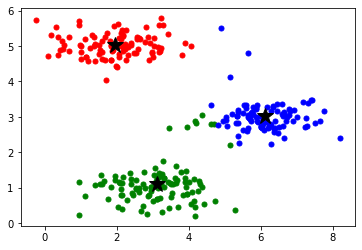

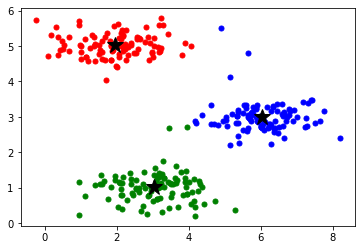

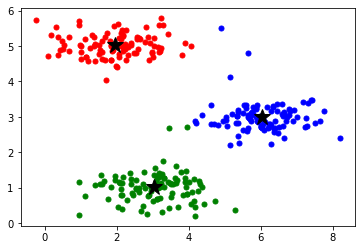

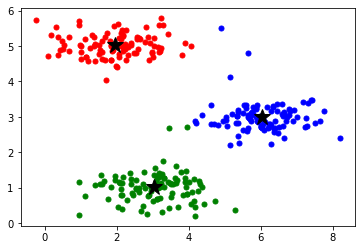

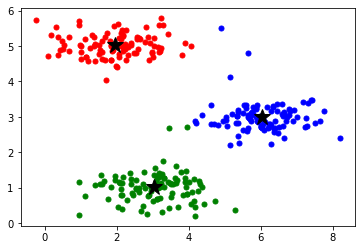

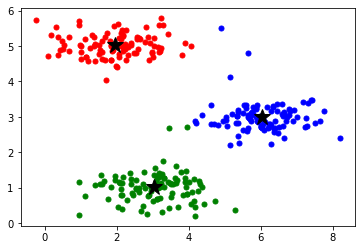

[[7.428921 3.466795]
 [5.367081 3.195026]
 [5.658583 4.799964]]


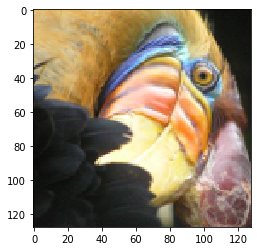

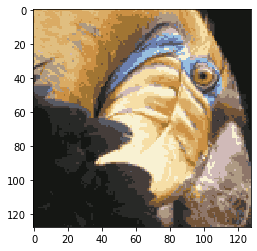

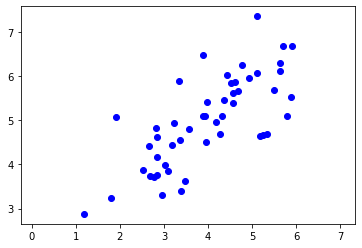

0.13223481183033525


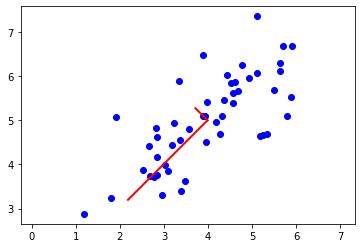

[1.481274]


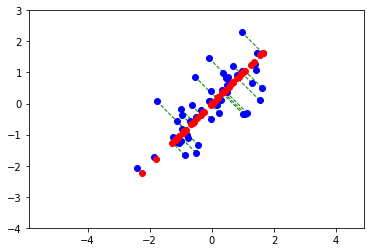

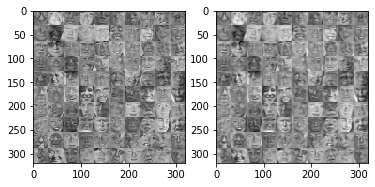

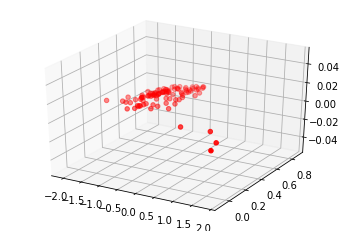

In [2]:
%matplotlib inline
import sys
from numpy import *
import scipy.misc, scipy.io, scipy.optimize
import imageio
from matplotlib import pyplot, cm, colors, lines
from mpl_toolkits.mplot3d import Axes3D

from util import Util
from timeit import Timer
from sklearn.decomposition import PCA as RandomizedPCA

#from ex7 import * #(this is for running in Python)
%run ex7.ipynb #(this is for running in JupyterLab)

EX_DIRECTORY_PATH = './data/'

def displayData( X ):
    width = 32
    rows = cols = int(sqrt( shape(X)[0] ))
    
    out = zeros(( width * rows, width * cols ))

    
    counter = 0
    for y in range(0, rows):
        for x in range(0, cols):
            start_x = x * width
            start_y = y * width
            out[start_x:start_x+width, start_y:start_y+width] = X[counter].reshape( width, width ).T
            counter += 1

    img = Util.toimage( out )
    axes     = pyplot.gca()
    figure     = pyplot.gcf()
    axes.imshow( img ).set_cmap( 'gray' )


def pca( X ):
    covariance     = X.T.dot( X ) / shape( X )[0]
    U, S, V     = linalg.svd( covariance )
    return U, S


def projectData( X, U, K ):
    return X.dot( U )[:, :K]


def recoverData( Z, U, K ):
    return Z.dot( U[:, :K].T )


def part2_1():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex7data1.mat" )
    X = mat['X']
    
    pyplot.plot( X[:, 0], X[:, 1], 'bo' )
    pyplot.axis( [0.5, 6.5, 2, 8] )
    pyplot.axis( 'equal' )
    pyplot.show( block=True )


def part2_2():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex7data1.mat" )
    X = mat['X']

    X_norm, mu, sigma = Util.featureNormalize( X )
    U, S = pca( X_norm )


    error = 1 - (sum( S[:1]) / sum( S))
    print (error)

    mu = mu.reshape( 1, 2)[0]
    mu_1 = mu + 1.5 * S[0] * U[:, 0]
    mu_2 = mu + 1.5 * S[1] * U[:, 1]


    pyplot.plot( X[:, 0], X[:, 1], 'bo' )

    pyplot.gca().add_line( lines.Line2D( xdata=[mu[0], mu_1[0]], ydata=[mu[1], mu_1[1]], c='r', lw=2 ) )    
    pyplot.gca().add_line( lines.Line2D( xdata=[mu[0], mu_2[0]], ydata=[mu[1], mu_2[1]], c='r', lw=2 ) )    
    pyplot.axis( [0.5, 6.5, 2, 8] )
    pyplot.axis( 'equal' )

    pyplot.show( block=True )



def part2_3():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex7data1.mat" )
    X = mat['X']

    X_norm, mu, sigma = Util.featureNormalize( X )
    U, S = pca( X_norm )

    K = 1
    Z = projectData( X_norm, U, K )
    print (Z[0]) # Should be 1.481

    X_rec = recoverData( Z, U, K )

    for i in range( 0, shape( X_rec)[0] ):
        pyplot.gca().add_line( lines.Line2D( xdata=[X_norm[i,0], X_rec[i,0]], ydata=[X_norm[i,1], X_rec[i,1]], c='g', lw=1, ls='--' ) )    

    pyplot.plot( X_norm[:, 0], X_norm[:, 1], 'bo' )
    pyplot.plot( X_rec[:, 0], X_rec[:, 1], 'ro' )    
    
    pyplot.axis( 'equal' )
    pyplot.axis( [-4, 3, -4, 3] )

    pyplot.show( block=True )


def part2_4():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex7faces.mat" )
    X = mat['X']

    # displayData( X[:100, :] )

    X_norm, mu, sigma = Util.featureNormalize( X )

    U, S = pca( X_norm )
    # displayData( U[:, :36].T )

    K = 100
    Z = projectData( X_norm, U, K )
    X_rec = recoverData( Z, U, K )

    pyplot.subplot( 1, 2, 1 )
    displayData( X_norm[:100, :] )
    pyplot.subplot( 1, 2, 2 )
    displayData( X_rec[:100, :] )
    pyplot.show( block=True )

def partExtra():
    A = imageio.imread( EX_DIRECTORY_PATH + "bird_small.png" )
    A             = A / 255.0
    img_size     = shape( A )

    X = A.reshape( img_size[0] * img_size[1], 3 )
    K = 16
    max_iters = 10


    initial_centroids = kMeansInitCentroids( X, K )
    centroids, idx = runkMeans( X, initial_centroids, max_iters )


    fig = pyplot.figure()
    axis = fig.add_subplot( 111, projection='3d' )
    # axis.scatter( X[:1000, 0], X[:1000, 1], X[:1000, 2], c=idx[:1000], marker='o' )
    # pyplot.show(block=True)

    X_norm, mu, sigma = Util.featureNormalize( X )

    U, S = pca( X_norm )
    Z = projectData( X_norm, U, 2 )
    axis.scatter( Z[:100, 0], Z[:100, 1], c='r', marker='o' )
    pyplot.show(block=True)



def main():
    part2_1()
    part2_2()
    part2_3()
    part2_4()
    partExtra()

if __name__ == '__main__':
    main()